# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\narayana\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [9]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:13<00:00, 1489.22it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:
# similarly you can preprocess the titles also

### Following Code blocks provided by me.

In [19]:
# Code took from original code provided.
# Also function used from original code.
preprocessed_titles = []

for sent in tqdm(project_data['project_title'].values):
    sent = decontracted(sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e.lower() for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 34031.71it/s]


In [20]:
preprocessed_titles[20000]

'need move input'

### Following Code blocks present in original notebook.

## 1.5 Preparing data for models

In [21]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [22]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [23]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [24]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### Following Code blocks provided by me.

In [25]:
# Code took from original code provided.
states = project_data['school_state'].unique()
vectorizer = CountVectorizer(vocabulary=list(states), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())

school_state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encoding", school_state_one_hot.shape)

['IN', 'FL', 'AZ', 'KY', 'TX', 'CT', 'GA', 'SC', 'NC', 'CA', 'NY', 'OK', 'MA', 'NV', 'OH', 'PA', 'AL', 'LA', 'VA', 'AR', 'WA', 'WV', 'ID', 'TN', 'MS', 'CO', 'UT', 'IL', 'MI', 'HI', 'IA', 'RI', 'NJ', 'MO', 'DE', 'MN', 'ME', 'WY', 'ND', 'OR', 'AK', 'MD', 'WI', 'SD', 'NE', 'NM', 'DC', 'KS', 'MT', 'NH', 'VT']
Shape of matrix after one hot encoding (109248, 51)


There are some NaN's in teacher_prefix column. replacing them with 'Mrs.' as that has high occurance in that column.

In [26]:
print("Number of NaN's before replacement in column: ", sum(project_data['teacher_prefix'].isna()))
project_data['teacher_prefix'] = project_data['teacher_prefix'].replace(np.nan, 'Mrs.', regex=True)
print("Number of NaN's after replacement in column: ", sum(project_data['teacher_prefix'].isna()))

# Output may show both zeros as I re-run this several times. But there are 3 zeros in original column.

Number of NaN's before replacement in column:  3
Number of NaN's after replacement in column:  0


In [27]:
# Code took from original code provided.
prefixes = project_data['teacher_prefix'].unique()
vectorizer = CountVectorizer(vocabulary=list(prefixes), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values)
print(vectorizer.get_feature_names())

teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values)
print("Shape of matrix after one hot encoding", teacher_prefix_one_hot.shape)

['Mrs.', 'Mr.', 'Ms.', 'Teacher', 'Dr.']
Shape of matrix after one hot encoding (109248, 5)


In [28]:
grades = project_data['project_grade_category'].unique()
vectorizer = CountVectorizer(vocabulary=list(grades), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())

project_grade_category_one_hot = vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encoding", project_grade_category_one_hot.shape)

['Grades PreK-2', 'Grades 6-8', 'Grades 3-5', 'Grades 9-12']
Shape of matrix after one hot encoding (109248, 4)


### Following Code blocks present in original notebook.

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [29]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [30]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

### Following Code blocks provided by me.

In [31]:
# Code took from original code provided.
# We are considering only the words which appeared in at least 5 documents(rows or projects).
# Reduced number as title has less words
vectorizer = CountVectorizer(min_df=10)
titles_bow = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ", titles_bow.shape)

Shape of matrix after one hot encodig  (109248, 3222)


### Following Code blocks present in original notebook.

#### 1.5.2.2 TFIDF vectorizer

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [33]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [34]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:40<00:00, 2678.85it/s]


109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [35]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [36]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [05:22<00:00, 338.46it/s]


109248
300


In [37]:
# Similarly you can vectorize for title also

### Following Code blocks provided by me.

In [38]:
# Code took from original code provided.
# tfidf of project titles
vectorizer = TfidfVectorizer(min_df=10)
titles_tfidf = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",titles_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 3222)


In [39]:
# Code took from original code provided.
# avg-w2v for project titles
avg_w2v_titles = []
for sentence in tqdm(preprocessed_titles):
    vector = np.zeros(300)
    cnt_words =0;
    for word in sentence.split():
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_titles.append(vector)

print(len(avg_w2v_titles))
print(len(avg_w2v_titles[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 55713.31it/s]


109248
300


In [40]:
# Code took from original code provided.
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [41]:
# Code took from original code provided.
# tfidf-w2v for project titles
tfidf_w2v_titles = []
for sentence in tqdm(preprocessed_titles):
    vector = np.zeros(300)
    tf_idf_weight =0
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_titles.append(vector)

print(len(tfidf_w2v_titles))
print(len(tfidf_w2v_titles[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:04<00:00, 25786.86it/s]


109248
300


### Following Code blocks present in original notebook.

### 1.5.3 Vectorizing Numerical features

In [42]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [43]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [44]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

### Following Code blocks provided by me.

In [45]:
warnings.filterwarnings("ignore")
# Code took from original code provided
scalar = StandardScaler()
scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print(f"Mean : {scalar.mean_[0]}, Standard deviation : {np.sqrt(scalar.var_[0])}")

# Now standardize the data with above maen and variance.
previously_posted_projects_standardized = \
                scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print(previously_posted_projects_standardized)

Mean : 11.153165275336848, Standard deviation : 27.77702641477403
[[-0.40152481]
 [-0.14951799]
 [-0.36552384]
 ...
 [-0.29352189]
 [-0.40152481]
 [-0.40152481]]


### Following Code blocks present in original notebook.

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [46]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)


In [47]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16663)

__ Computing Sentiment Scores__

In [48]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\narayana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 5: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Logistic Regression </h1>

### Some code blocks are taken from previous assignments. And some used the code present in original file ('5_DonorsChoose_LR.ipynb') which is mentioned in comments.

### Following Code blocks provided by me.

**Adding a column `summary_numeric_bool` instead of `project_resource_summary` column which tells if resource summary has a number in it**

In [49]:
# ref: https://stackoverflow.com/questions/4138202/using-isdigit-for-floats
def nums_in_str(text):
    """
    Returns list of numbers present in the given string. Numbers := floats ints etc.
    """
    result = []
    for s in text.split():
        try:
            x = float(s)
            result.append(x)
        except:
            continue
    return result

In [50]:
print(nums_in_str('HE44LLo 56 are -89 I 820.353 in -78.39 what .293 about 00'))

[56.0, -89.0, 820.353, -78.39, 0.293, 0.0]


In [51]:
numbers_in_summary = np.array([len(nums_in_str(s)) for s in project_data['project_resource_summary']])
project_data['summary_numeric_bool'] = list(map(int, numbers_in_summary>0))

### Taking Relevant columns as X (input data to model) and y (output class label)

In [52]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'summary_numeric_bool'],
      dtype='object')

In [53]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2          ...           \
0  \"The limits of your language are the limits o...          ...            
1  The projector we need for our school is very c...          ...            

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

  teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            0                    0   
1                                            7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  price  quantity  \
0  My students are English learners that are work...  154.6        23   
1  Our students arrive to our school eager to lea...  299.0         1   

   summary_numeric_bool  
0                     0  
1                     0  

[2 rows x 21 columns]

In [54]:
# Categorical and numerical columns are listed below.
X_columns = ['teacher_prefix', 'school_state', 'project_grade_category', 'summary_numeric_bool',\
             'teacher_number_of_previously_posted_projects', 'clean_categories', 'clean_subcategories',\
             'price', 'quantity']
X = project_data[X_columns]
y = project_data['project_is_approved']

**Adding preprocessed_essays and preprocessed_titles as columns to X before splitting**

In [55]:
X['essay'] = preprocessed_essays
X['project_title'] = preprocessed_titles
X_columns.append('essay')
X_columns.append('project_title')
print('final columns used in input data are: ', X_columns)

final columns used in input data are:  ['teacher_prefix', 'school_state', 'project_grade_category', 'summary_numeric_bool', 'teacher_number_of_previously_posted_projects', 'clean_categories', 'clean_subcategories', 'price', 'quantity', 'essay', 'project_title']


**Adding essays and calculating sentiments to Input data X before splitting as we have to use same train and test rows later for Task-2 analysis. These columns are not considered in our Task-1 analysis**

In [56]:
X['essay_1'] = project_data['project_essay_1']
X['essay_2'] = project_data['project_essay_2']
X['essay_3'] = project_data['project_essay_3']
X['essay_4'] = project_data['project_essay_4']

In [57]:
sia = SentimentIntensityAnalyzer()
for esnum in range(1, 5):
    sentim_data = []
    for es in project_data['project_essay_' + str(esnum)]:
        sentim_data.append(list(sia.polarity_scores(str(es)).values()))
    df_cols = ['essay' + str(esnum) + '_neg', 'essay' + str(esnum) + '_nue',\
               'essay' + str(esnum) + '_pos', 'essay' + str(esnum) + '_comp']
    sentim_data = pd.DataFrame(sentim_data, columns=df_cols)
    X = pd.concat([X, sentim_data], axis=1)

In [58]:
X['essay_word_count'] = [len(es.split()) for es in X['essay']]
X['title_word_count'] = [len(title.split()) for title in X['project_title']]

In [59]:
print(X.columns)

Index(['teacher_prefix', 'school_state', 'project_grade_category',
       'summary_numeric_bool', 'teacher_number_of_previously_posted_projects',
       'clean_categories', 'clean_subcategories', 'price', 'quantity', 'essay',
       'project_title', 'essay_1', 'essay_2', 'essay_3', 'essay_4',
       'essay1_neg', 'essay1_nue', 'essay1_pos', 'essay1_comp', 'essay2_neg',
       'essay2_nue', 'essay2_pos', 'essay2_comp', 'essay3_neg', 'essay3_nue',
       'essay3_pos', 'essay3_comp', 'essay4_neg', 'essay4_nue', 'essay4_pos',
       'essay4_comp', 'essay_word_count', 'title_word_count'],
      dtype='object')


<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [60]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

**Not creating CV data as I am using K-fold validation**

In [61]:
# Code took from SAMPLE_SOLUTION notebook
# splitting into 80-20 ratio for train-test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

In [62]:
print(X_train.shape)
print(X_test.shape)
print('='*30)
print(y_train.shape)
print(y_test.shape)

(87398, 33)
(21850, 33)
(87398,)
(21850,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [63]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

**numerical columns**
- `teacher_number_of_previously_posted_projects`
- `price`
- `quantity`

Leaving `summary_numeric_bool` as it is because it only has 0's and 1's in it.

**categorical columns**
- `teacher_prefix`
- `school_state`
- `project_grade_category`
- `clean_categories`
- `clean_subcategories`

### Normalizing `teacher_number_of_previously_posted_projects` column

In [64]:
warnings.filterwarnings("ignore")
# Code took from original Code provided.
scaler = StandardScaler()
scaler.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print(f"Mean : {scaler.mean_[0]}, Standard deviation : {np.sqrt(scaler.var_[0])}")

Mean : 11.243689786951647, Standard deviation : 27.921592393750732


In [65]:
warnings.filterwarnings("ignore")
X_train_tnppp_norm = scaler.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_tnppp_norm = scaler.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

### Normalizing `price` column

In [66]:
# Code took from original Code provided.
scaler = StandardScaler()
scaler.fit(X_train['price'].values.reshape(-1,1))
print(f"Mean : {scaler.mean_[0]}, Standard deviation : {np.sqrt(scaler.var_[0])}")

Mean : 297.95290899105237, Standard deviation : 367.63484618648334


In [67]:
X_train_price_norm = scaler.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = scaler.transform(X_test['price'].values.reshape(-1,1))

### Normalizing `quantity` column

In [68]:
warnings.filterwarnings("ignore")
# Code took from original Code provided.
scaler = StandardScaler()
scaler.fit(X_train['quantity'].values.reshape(-1,1))
print(f"Mean : {scaler.mean_[0]}, Standard deviation : {np.sqrt(scaler.var_[0])}")

Mean : 16.95123458202705, Standard deviation : 25.891707436765085


In [69]:
warnings.filterwarnings("ignore")
X_train_quant_norm = scaler.transform(X_train['quantity'].values.reshape(-1,1))
X_test_quant_norm = scaler.transform(X_test['quantity'].values.reshape(-1,1))

### Encoding `teacher_prefix` column

In [70]:
# Code took from SAMPLE_SOLUTION notebook.
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)
print(vectorizer.get_feature_names())

['dr', 'mr', 'mrs', 'ms', 'teacher']


In [71]:
# Code took from SAMPLE_SOLUTION notebook.
X_train_prefix_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_prefix_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print(X_train_prefix_ohe.shape, y_train.shape)
print(X_test_prefix_ohe.shape, y_test.shape)

(87398, 5) (87398,)
(21850, 5) (21850,)


### Encoding `school_state` column

In [72]:
# Code took from SAMPLE_SOLUTION notebook.
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)
print(vectorizer.get_feature_names())

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [73]:
# Code took from SAMPLE_SOLUTION notebook.
X_train_school_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_school_ohe = vectorizer.transform(X_test['school_state'].values)

print(X_train_school_ohe.shape, y_train.shape)
print(X_test_school_ohe.shape, y_test.shape)

(87398, 51) (87398,)
(21850, 51) (21850,)


### Encoding `project_grade_category` column

In [74]:
# Code took from original Code provided.
grades = X_train['project_grade_category'].unique()
vectorizer = CountVectorizer(vocabulary=list(grades), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)
print(vectorizer.get_feature_names())

['Grades PreK-2', 'Grades 3-5', 'Grades 9-12', 'Grades 6-8']


In [75]:
# Code took from SAMPLE_SOLUTION notebook.
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)

(87398, 4) (87398,)
(21850, 4) (21850,)


### Encoding `clean_categories` column

In [76]:
# Code took from original Code provided.
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
print(vectorizer.get_feature_names())

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


In [77]:
# Code took from SAMPLE_SOLUTION notebook.
X_train_categ_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_test_categ_ohe = vectorizer.transform(X_test['clean_categories'].values)

print(X_train_categ_ohe.shape, y_train.shape)
print(X_test_categ_ohe.shape, y_test.shape)

(87398, 9) (87398,)
(21850, 9) (21850,)


### Encoding `clean_subcategories` column

In [78]:
# Code took from original Code provided.
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)
print(vectorizer.get_feature_names())

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


In [79]:
# Code took from SAMPLE_SOLUTION notebook.
X_train_subcat_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_subcat_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print(X_train_subcat_ohe.shape, y_train.shape)
print(X_test_subcat_ohe.shape, y_test.shape)

(87398, 30) (87398,)
(21850, 30) (21850,)


### Combining categorical and numerical data for further use.

In [80]:
from scipy.sparse import hstack
cat_num_train = hstack((X_train_tnppp_norm, X_train_price_norm, X_train_quant_norm,\
                        np.array(X_train['summary_numeric_bool']).reshape(-1, 1),\
                        X_train_prefix_ohe, X_train_grade_ohe, X_train_school_ohe, X_train_categ_ohe, X_train_subcat_ohe))
cat_num_test = hstack((X_test_tnppp_norm, X_test_price_norm, X_test_quant_norm,\
                       np.array(X_test['summary_numeric_bool']).reshape(-1, 1),\
                       X_test_prefix_ohe, X_test_grade_ohe, X_test_school_ohe, X_test_categ_ohe, X_test_subcat_ohe))

In [81]:
print(cat_num_train.shape, y_train.shape)
print(cat_num_test.shape, y_test.shape)

(87398, 103) (87398,)
(21850, 103) (21850,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [82]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### Converting `essay` column to vector using Bag of Words (BoW).

In [83]:
# Code took from original Code provided.
vectorizer = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=5000)
vectorizer.fit(X_train['essay'].values)
print(len(vectorizer.get_feature_names()))

5000


In [84]:
# Code took from SAMPLE_SOLUTION notebook.
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)

(87398, 5000) (87398,)
(21850, 5000) (21850,)


### Converting `essay` column to vector using TFIDF Vectorizer.

In [85]:
# Code took from original Code provided.
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=10, max_features=5000)
vectorizer.fit(X_train['essay'].values)
print(len(vectorizer.get_feature_names()))

5000


In [86]:
# Code took from SAMPLE_SOLUTION notebook.
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)

(87398, 5000) (87398,)
(21850, 5000) (21850,)


### Converting `essay` column to vector using Average Word2Vec.

**Creating function to return average word2vec vectors given sentences**

In [87]:
 # Code took from original Code provided.
def avg_w2v(arr):
    """
    Returns array of vectors given array of sentences. Array of vectors are created by Average Word2Vec method and vectors for \
    words is taken from 'glove_vectors' file.
    """
    avg_w2v_vectors = []
    for sentence in tqdm(arr):
        vector = np.zeros(300)
        cnt_words = 0
        for word in sentence.split():
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return avg_w2v_vectors

In [88]:
X_train_essay_avgw2v = np.array(avg_w2v(X_train['essay'].values))
X_test_essay_avgw2v = np.array(avg_w2v(X_test['essay'].values))

print(X_train_essay_avgw2v.shape, y_train.shape)
print(X_test_essay_avgw2v.shape, y_test.shape)

100%|██████████████████████████████████████████████████████████████████████████| 21850/21850 [00:07<00:00, 2853.37it/s]


(87398, 300) (87398,)
(21850, 300) (21850,)


### Converting `essay` column to vector using TFIDF weighted Word2Vec.

**Creating function to return tfidf weighted word2vec vectors given sentences and idf dictionary for words**

In [89]:
# Code took from original Code provided.
def tfidf_w2v(arr, idf_dict):
    """
    Returns array of vectors given array of sentences and dictionary containing IDF values for words.
    Array of vectors are created by TFIDF weighted Word2Vec method and vectors for words is taken from 'glove_vectors' file.
    """
    tfidf_w2v_vectors = []
    for sentence in tqdm(arr):
        vector = np.zeros(300)
        tf_idf_weight = 0;
        for word in sentence.split():
            if (word in glove_words) and (word in idf_dict):
                vec = model[word]
                tf_idf = idf_dict[word]/len(sentence.split())
                vector += (vec * tf_idf)
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    return tfidf_w2v_vectors

**Getting idf values for the words in X_train.essay data**

In [90]:
# Code took from original Code provided.
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))

In [91]:
X_train_essay_tfidfw2v = np.array(tfidf_w2v(X_train['essay'].values, dictionary))
X_test_essay_tfidfw2v = np.array(tfidf_w2v(X_test['essay'].values, dictionary))

print(X_train_essay_tfidfw2v.shape, y_train.shape)
print(X_test_essay_tfidfw2v.shape, y_test.shape)

100%|███████████████████████████████████████████████████████████████████████████| 21850/21850 [00:54<00:00, 402.77it/s]


(87398, 300) (87398,)
(21850, 300) (21850,)


### Converting `project_title` column to vector using Bag of Words (BoW).

In [92]:
# Code took from original Code provided.
vectorizer = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=5000)
vectorizer.fit(X_train['project_title'].values)
print(len(vectorizer.get_feature_names()))

5000


In [93]:
# Code took from SAMPLE_SOLUTION notebook.
X_train_title_bow = vectorizer.transform(X_train['project_title'].values)
X_test_title_bow = vectorizer.transform(X_test['project_title'].values)

print(X_train_title_bow.shape, y_train.shape)
print(X_test_title_bow.shape, y_test.shape)

(87398, 5000) (87398,)
(21850, 5000) (21850,)


### Converting `project_title` column to vector using TFIDF Vectorizer.

In [94]:
# Code took from original Code provided.
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=10, max_features=5000)
vectorizer.fit(X_train['project_title'].values)
print(len(vectorizer.get_feature_names()))

5000


In [95]:
# Code took from SAMPLE_SOLUTION notebook.
X_train_title_tfidf = vectorizer.transform(X_train['project_title'].values)
X_test_title_tfidf = vectorizer.transform(X_test['project_title'].values)

print(X_train_title_tfidf.shape, y_train.shape)
print(X_test_title_tfidf.shape, y_test.shape)

(87398, 5000) (87398,)
(21850, 5000) (21850,)


### Converting `project_title` column to vector using Average Word2Vec.

**Can use avg_w2v function**

In [96]:
X_train_title_avgw2v = np.array(avg_w2v(X_train['project_title'].values))
X_test_title_avgw2v = np.array(avg_w2v(X_test['project_title'].values))

print(X_train_title_avgw2v.shape, y_train.shape)
print(X_test_title_avgw2v.shape, y_test.shape)

100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:00<00:00, 64678.36it/s]


(87398, 300) (87398,)
(21850, 300) (21850,)


### Converting `project_title` column to vector using TFIDF weighted Word2Vec.

**Can use tfidf_w2v function but should calculate idf dictionary before using it**

In [97]:
# Code took from original Code provided.
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))

In [98]:
X_train_title_tfidfw2v = np.array(tfidf_w2v(X_train['project_title'].values, dictionary))
X_test_title_tfidfw2v = np.array(tfidf_w2v(X_test['project_title'].values, dictionary))

print(X_train_title_tfidfw2v.shape, y_train.shape)
print(X_test_title_tfidfw2v.shape, y_test.shape)

100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:00<00:00, 28995.37it/s]


(87398, 300) (87398,)
(21850, 300) (21850,)


<h2>2.4 Appling Logistic Regression on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Logistic Regression on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [99]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [100]:
bow_train = hstack((cat_num_train, X_train_essay_bow, X_train_title_bow)).tocsr()
bow_test = hstack((cat_num_test, X_test_essay_bow, X_test_title_bow)).tocsr()

tfidf_train = hstack((cat_num_train, X_train_essay_tfidf, X_train_title_tfidf)).tocsr()
tfidf_test = hstack((cat_num_test, X_test_essay_tfidf, X_test_title_tfidf)).tocsr()

avgw2v_train = np.hstack((cat_num_train.toarray(), X_train_essay_avgw2v, X_train_title_avgw2v))
avgw2v_test = np.hstack((cat_num_test.toarray(), X_test_essay_avgw2v, X_test_title_avgw2v))

tfidfw2v_train = np.hstack((cat_num_train.toarray(), X_train_essay_tfidfw2v, X_train_title_tfidfw2v))
tfidfw2v_test = np.hstack((cat_num_test.toarray(), X_test_essay_tfidfw2v, X_test_title_tfidfw2v))

print('='*30)
print(bow_train.shape)
print(bow_test.shape)
print('='*30)
print(tfidf_train.shape)
print(tfidf_test.shape)
print('='*30)
print(avgw2v_train.shape)
print(avgw2v_test.shape)
print('='*30)
print(tfidfw2v_train.shape)
print(tfidfw2v_test.shape)
print('='*30)

(87398, 10103)
(21850, 10103)
(87398, 10103)
(21850, 10103)
(87398, 703)
(21850, 703)
(87398, 703)
(21850, 703)


**Writing several functions to reuse them later**

**Function to plot AUC values with respect to hyper-parameter C given train data using K-fold validation**

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import math

# Code inside function took from SAMPLE_SOLUTION notebook
def auc_vs_K_plot(X_train, y_train, Cs, logplot=True):
    """
    Plots the AUC results for different C values on train and CV data
    Parameters:
    X_train, y_train - data which is used for K-fold validation and used to train LogisticRegression model
    Cs - list of C values on which we have to train the data and plot the results
    """
    lr_model = LogisticRegression()
    parameters = {'C': Cs}
    clf = GridSearchCV(lr_model, parameters, cv=3, scoring='roc_auc')
    clf.fit(X_train, y_train)
    
    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score']
    cv_auc_std= clf.cv_results_['std_test_score']

    plt.figure(figsize=(12, 6))
    if logplot:
        # taking logs of Cs to plot a log-plot
        x_axis_ticks = [math.log10(i) for i in Cs]
    else:
        x_axis_ticks = Cs
    plt.plot(x_axis_ticks, train_auc, label='Train AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(x_axis_ticks, train_auc - train_auc_std, train_auc + train_auc_std, alpha=0.2, color='darkblue')

    plt.plot(x_axis_ticks, cv_auc, label='CV AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(x_axis_ticks, cv_auc - cv_auc_std, cv_auc + cv_auc_std, alpha=0.2, color='darkorange')

    plt.scatter(x_axis_ticks, train_auc, label='Train AUC points')
    plt.scatter(x_axis_ticks, cv_auc, label='CV AUC points')
    
    plt.legend()
    plt.xlabel("C")
    # Setting x-ticks to match with actual C calues
    if logplot:
        plt.xticks(x_axis_ticks, ["{:.0e}".format(i) for i in Cs])
    plt.ylabel("AUC")
    plt.title("AUC PLOTS for train and CV data")
    plt.grid()
    plt.show()

**Function to plots ROC curves and confusion matrices for train and test data. Function returns AUC Values for train, test data**

In [102]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from IPython.display import Markdown, display

# Code inside function took from SAMPLE_SOLUTION notebook
def ROC_conf_mat(X_train, y_train, X_test, y_test, best_C, plots = True):
    """
    Plots ROC Curve given a C value, Train data and Test data using LogisticRegression.
    And also plots confusion matrix for train data and test data taking a optimal threshold from ROC curve.
    Returns Area Under ROC Curve for Train, Test data which can be taken as performance of the model.
    """
    # Plotting ROC Curve code
    lr_model = LogisticRegression(C = best_C)
    lr_model.fit(X_train, y_train)

    y_train_pred = lr_model.predict_proba(X_train)[:, 1]
    y_test_pred = lr_model.predict_proba(X_test)[:, 1]

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
    
    result = {}
    
    result['train_auc'], result['test_auc'] = (auc(train_fpr, train_tpr), auc(test_fpr, test_tpr))

    if(plots):
        display(Markdown(f"**Analysis for C = {best_C}**"))

        plt.plot(train_fpr, train_tpr, label="train AUC ="+str(np.round(result['train_auc'], 3)))
        plt.plot(test_fpr, test_tpr, label="test AUC ="+str(np.round(result['test_auc'], 3)))
        plt.legend()
        plt.xlabel("False Positive rate")
        plt.ylabel("True Positive rate")
        plt.title("ROC Curves for Train and Test data")
        plt.grid()
        plt.show()

        # Printing confusion matrices code
        thr_train = tr_thresholds[np.argmax(train_tpr*(1-train_fpr))]
        thr_test = te_thresholds[np.argmax(test_tpr*(1-test_fpr))]

        print(f"\nConfusion matrix for Train data with {thr_train} as threshold:")
        predictions = []
        for i in y_train_pred:
            if i >= thr_train:
                predictions.append(1)
            else:
                predictions.append(0)
        ax = sns.heatmap(confusion_matrix(y_train, predictions), annot=True, fmt='g')
        ax.set_yticklabels(['Rejected', 'Accepted'])
        ax.set_xticklabels(['Rejected', 'Accepted'])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title('Confusion matrix for Train')
        plt.show()

        print(f"\nConfusion matrix for Test data with {thr_test} as threshold:")
        predictions = []
        for i in y_test_pred:
            if i >= thr_test:
                predictions.append(1)
            else:
                predictions.append(0)
        ax = sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')
        ax.set_yticklabels(['Rejected', 'Accepted'])
        ax.set_xticklabels(['Rejected', 'Accepted'])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title('Confusion matrix for Test')
        plt.show()
    
    return result

### 2.4.1 Applying Logistic Regression on BOW,<font color='red'> SET 1</font>

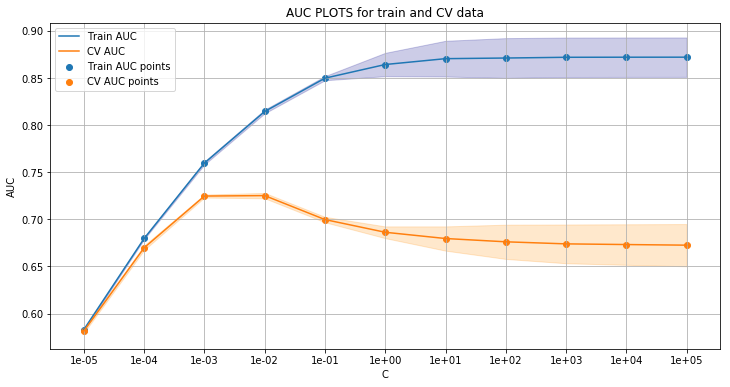

In [103]:
Cs = [10**i for i in range(-5, 6)]
auc_vs_K_plot(bow_train, y_train, Cs, logplot=True)

**C = 1e-03 (i.e. 0.001) seems to be fine but that might be underfitting our test data. Lets see C values between 0.01 and 0.001 to determine a good value for C**

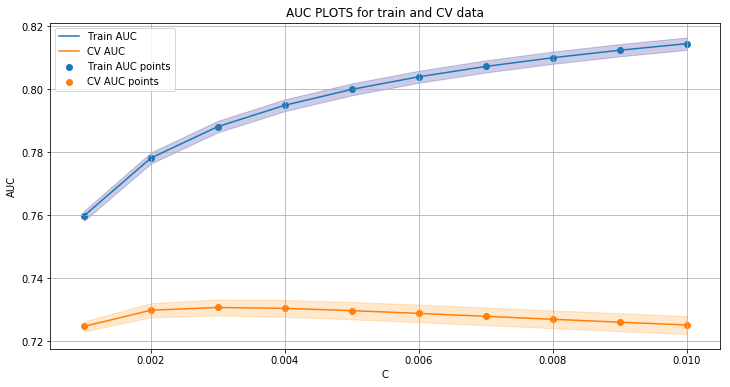

In [104]:
Cs = np.arange(0.001, 0.011, 0.001)
auc_vs_K_plot(bow_train, y_train, Cs, logplot=False)

**Taking C = 0.002 as the best C value**

In [105]:
bow_result = {}

**Analysis for C = 0.002**

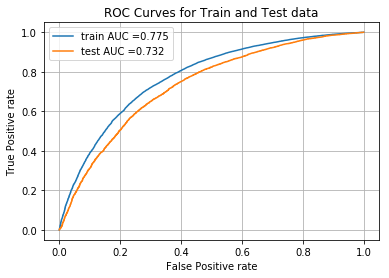


Confusion matrix for Train data with 0.8317442300843537 as threshold:


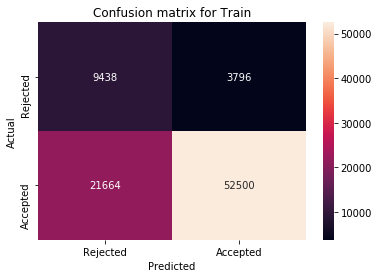


Confusion matrix for Test data with 0.8270283366026964 as threshold:


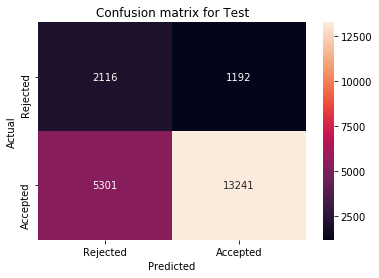

In [106]:
bow_result[0.002] = ROC_conf_mat(bow_train, y_train, bow_test, y_test, 0.002)

### 2.4.2 Applying Logistic Regression on TFIDF,<font color='red'> SET 2</font>

**Reducing Range of C as for extreme values it is going to overfit or underfit**

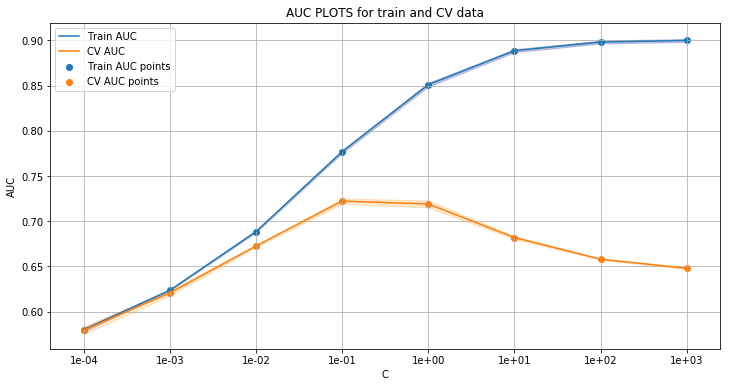

In [107]:
Cs = [10**i for i in range(-4, 4)]
auc_vs_K_plot(tfidf_train, y_train, Cs, logplot=True)

**Taking C in range [0.1, 1]**

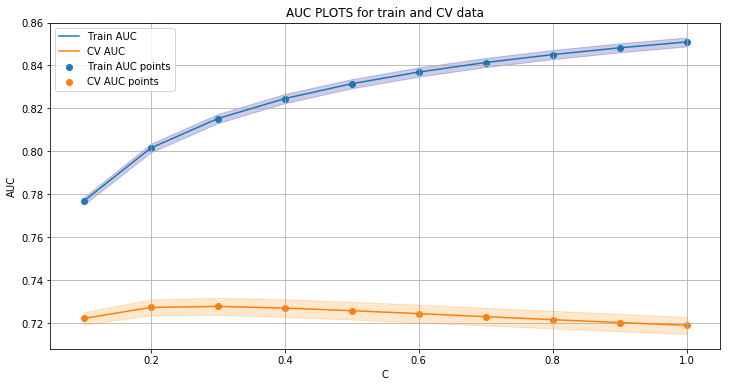

In [108]:
Cs = np.arange(0.1, 1.1, 0.1)
auc_vs_K_plot(tfidf_train, y_train, Cs, logplot=False)

**C = 0.2 seems to be fine**

In [109]:
tfidf_result = {}

**Analysis for C = 0.2**

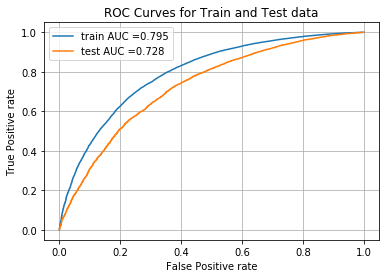


Confusion matrix for Train data with 0.8357791503349676 as threshold:


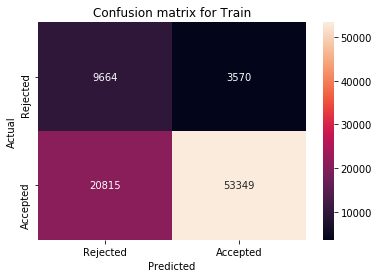


Confusion matrix for Test data with 0.8366156062948799 as threshold:


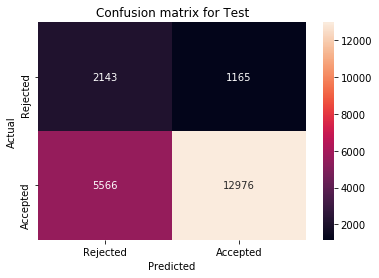

In [110]:
tfidf_result[0.2] = ROC_conf_mat(tfidf_train, y_train, tfidf_test, y_test, 0.2)

### 2.4.2 Applying Logistic Regression on Average Word2Vec,<font color='red'> SET 3</font>

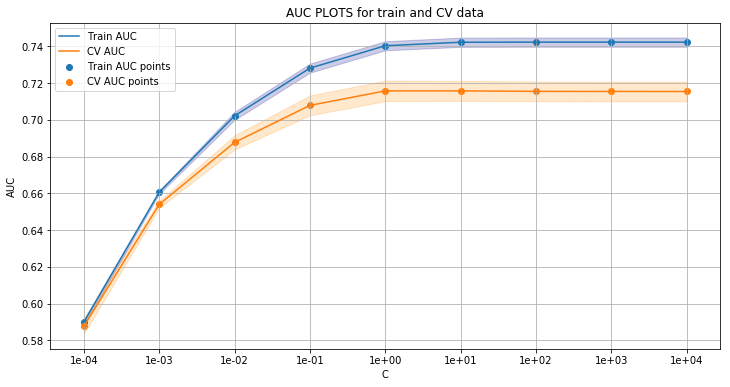

In [111]:
Cs = [10**i for i in range(-4, 5)]
auc_vs_K_plot(avgw2v_train, y_train, Cs, logplot=True)

**C = 1 seems to be fine as best hyper-parameter**

In [112]:
avgw2v_result = {}

**Analysis for C = 1**

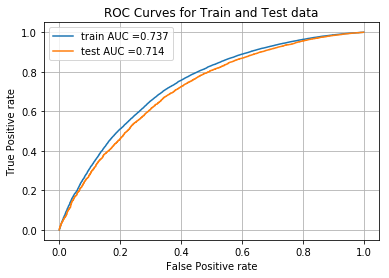


Confusion matrix for Train data with 0.8361791770676386 as threshold:


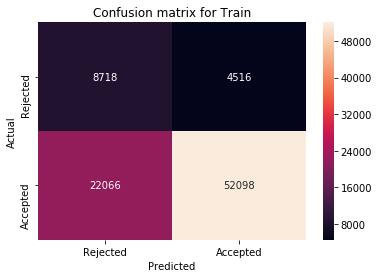


Confusion matrix for Test data with 0.8456025229640501 as threshold:


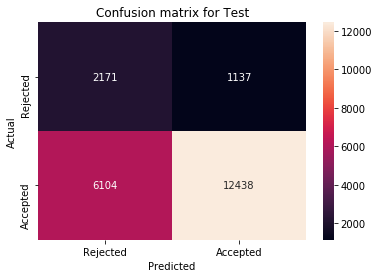

In [113]:
avgw2v_result[1] = ROC_conf_mat(avgw2v_train, y_train, avgw2v_test, y_test, 1)

### 2.4.2 Applying Logistic Regression on TFIDF Weighted Word2Vec,<font color='red'> SET 4</font>

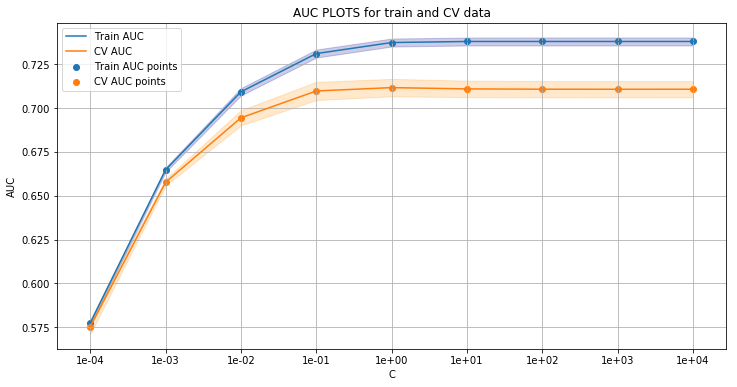

In [114]:
Cs = [10**i for i in range(-4, 5)]
auc_vs_K_plot(tfidfw2v_train, y_train, Cs, logplot=True)

**C = 0.1 or 1 seems to be fine as best hyper-parameter but we can search for best hyper-parameter in between them**

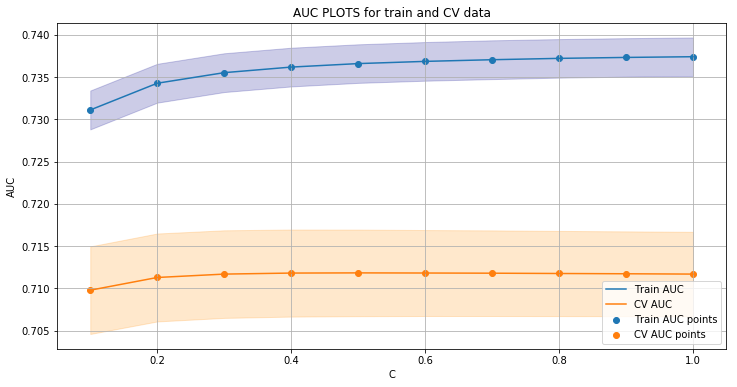

In [115]:
Cs = np.arange(0.1, 1.1, 0.1)
auc_vs_K_plot(tfidfw2v_train, y_train, Cs, logplot=False)

**C = 0.3 seems fine as best hyper-parameter**

In [116]:
tfidfw2v_result = {}

**Analysis for C = 0.3**

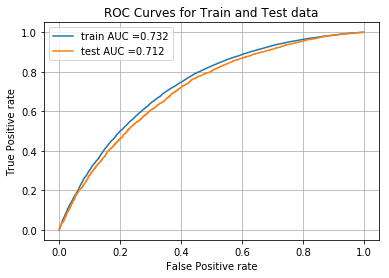


Confusion matrix for Train data with 0.8349110372999178 as threshold:


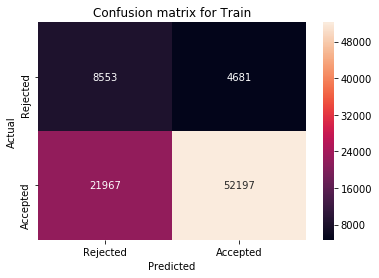


Confusion matrix for Test data with 0.836373476354677 as threshold:


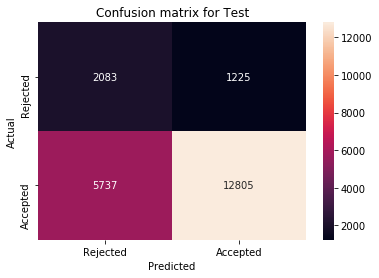

In [117]:
tfidfw2v_result[0.3] = ROC_conf_mat(tfidfw2v_train, y_train, tfidfw2v_test, y_test, 0.3)

<h2>2.5 Logistic Regression with added Features `Set 5` </h2>

In [118]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

**Getting sentiment scores for different essays and numerical and categorical features to produce our input matrix**

In [119]:
sentim_cols = ['essay1_neg', 'essay1_nue', 'essay1_pos', 'essay1_comp', 'essay2_neg',\
       'essay2_nue', 'essay2_pos', 'essay2_comp', 'essay1_neg', 'essay1_nue',\
       'essay1_pos', 'essay1_comp', 'essay2_neg', 'essay2_nue', 'essay2_pos',\
       'essay2_comp', 'essay3_neg', 'essay3_nue', 'essay3_pos', 'essay3_comp',\
       'essay4_neg', 'essay4_nue', 'essay4_pos', 'essay4_comp', 'essay_word_count', 'title_word_count']
Task2_train = hstack((cat_num_train, np.array(X_train[sentim_cols])))
Task2_test = hstack((cat_num_test, np.array(X_test[sentim_cols])))

print(Task2_train.shape, y_train.shape)
print(Task2_test.shape, y_test.shape)

(87398, 129) (87398,)
(21850, 129) (21850,)


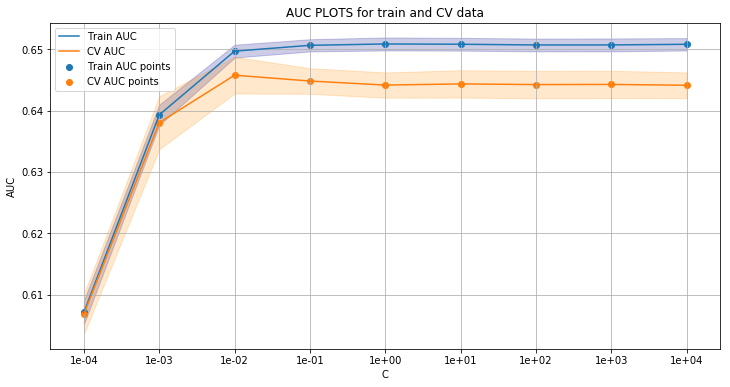

In [120]:
Cs = [10**i for i in range(-4, 5)]
auc_vs_K_plot(Task2_train, y_train, Cs, logplot=True)

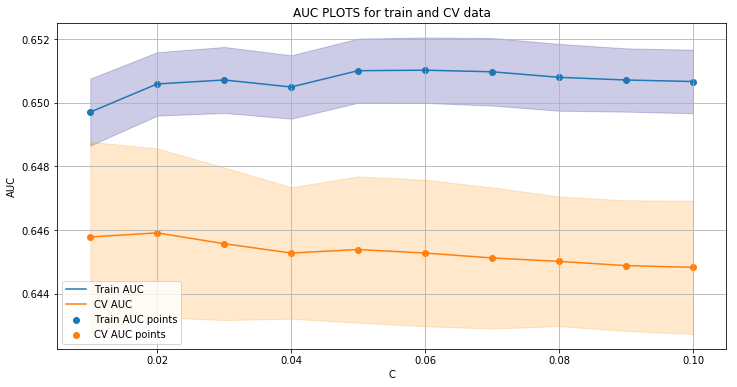

In [121]:
Cs = np.arange(0.01, 0.11, 0.01)
auc_vs_K_plot(Task2_train, y_train, Cs, logplot=False)

**Taking 0.02 as best C**

In [122]:
task2_result = {}

**Analysis for C = 0.02**

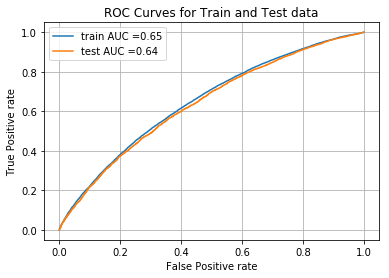


Confusion matrix for Train data with 0.8435736066741484 as threshold:


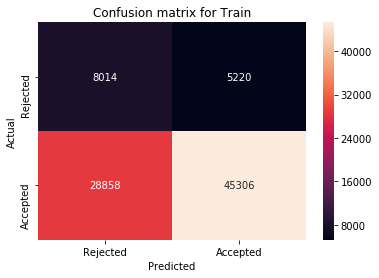


Confusion matrix for Test data with 0.849805298632743 as threshold:


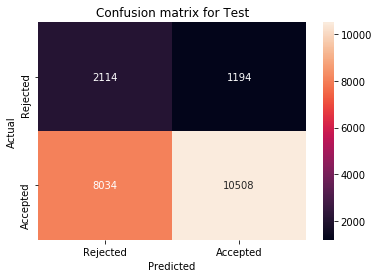

In [123]:
task2_result[0.02] = ROC_conf_mat(Task2_train, y_train, Task2_test, y_test, 0.02)

<h1>3. Conclusion</h1>

In [124]:
# Please compare all your models using Prettytable library

In [137]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['SET', 'C-HyperParameter', 'Train AUC', 'Test AUC']
table.add_row(['Bag of Words', 0.002, np.round(bow_result[0.002]['train_auc'], 3),\
               np.round(bow_result[0.002]['test_auc'], 3)])
table.add_row(['TfIdf', 0.2, np.round(tfidf_result[0.2]['train_auc'], 3),\
               np.round(tfidf_result[0.2]['test_auc'], 3)])
table.add_row(['Average Word2Vec', 1, np.round(avgw2v_result[1]['train_auc'], 3),\
               np.round(avgw2v_result[1]['test_auc'], 3)])
table.add_row(['TfIdf Word2Vec', 0.3, np.round(tfidfw2v_result[0.3]['train_auc'], 3),\
               np.round(tfidfw2v_result[0.3]['test_auc'], 3)])
table.add_row(['Numerical, Category and Sentiment data', 0.02, np.round(task2_result[0.02]['train_auc'], 3),\
               np.round(task2_result[0.02]['test_auc'], 3)])
print(table)

+----------------------------------------+------------------+-----------+----------+
|                  SET                   | C-HyperParameter | Train AUC | Test AUC |
+----------------------------------------+------------------+-----------+----------+
|              Bag of Words              |      0.002       |   0.775   |  0.732   |
|                 TfIdf                  |       0.2        |   0.795   |  0.728   |
|            Average Word2Vec            |        1         |   0.737   |  0.714   |
|             TfIdf Word2Vec             |       0.3        |   0.732   |  0.712   |
| Numerical, Category and Sentiment data |       0.02       |    0.65   |   0.64   |
+----------------------------------------+------------------+-----------+----------+


**SUMMARY:**
- **Bag of Words and TfIdf models did good than Word2Vec models. Although the gap between train and test auc is slightly less for Word2Vec**
- **Using only numerical, categorical and Sentiment data didnt do much good. The performance is lower than all other models. If  time performance is very important Word2Vec can be taken as it has much less columns than BOW and TFIDF models. And when it comes to time, BOW and TFIDF models took lot of time to train on. And time taken for predicting also is slightly longer than others**
- **When compared to other machine learning models i.e. Naive Bayes, KNN etc, Logistic Regression did well than those models.**